In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 2, (3): uses different numerical methods (Euler, Heun’s method, and 4th-order Runge-Kutta) to solve the system of equations

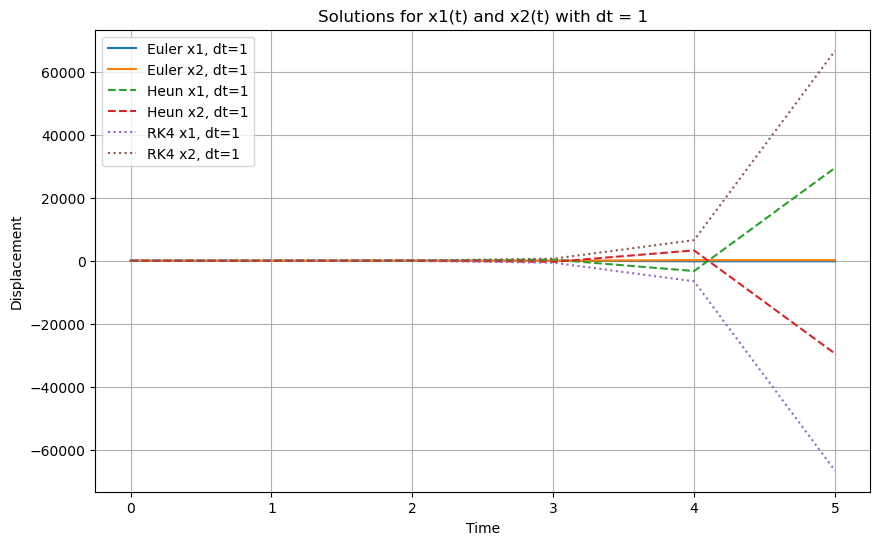

dt = 1:
  Euler method error: 5111.684571973921
  Heun's method error: 41753.94386323489
  4th-order Runge-Kutta error: 308610.39502344024


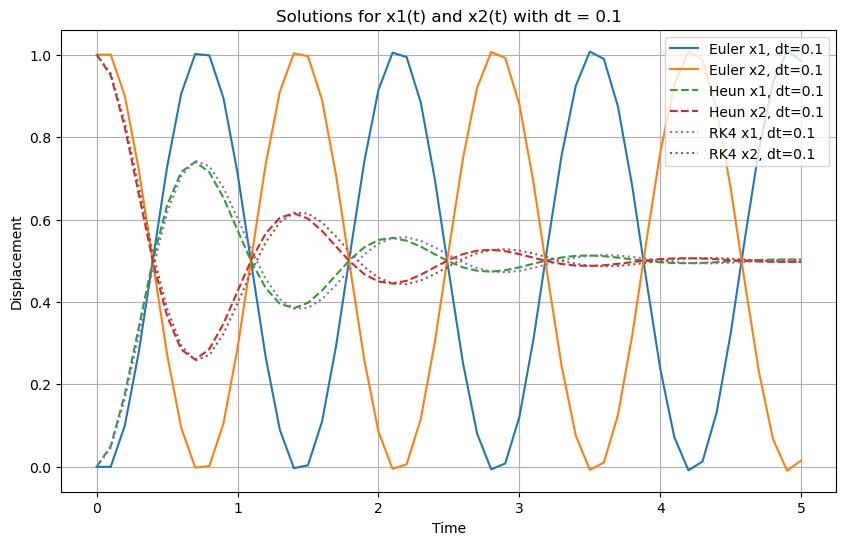

dt = 0.1:
  Euler method error: 1.8574438892622755
  Heun's method error: 0.013188724092078103
  4th-order Runge-Kutta error: 0.0001504055949161511


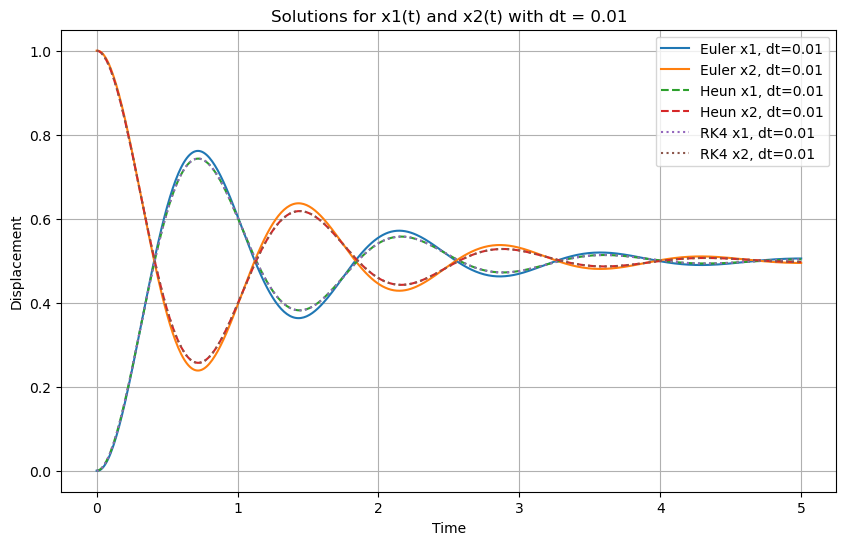

dt = 0.01:
  Euler method error: 0.005538861856692954
  Heun's method error: 0.00014770001376103955
  4th-order Runge-Kutta error: 1.0532216868749104e-08


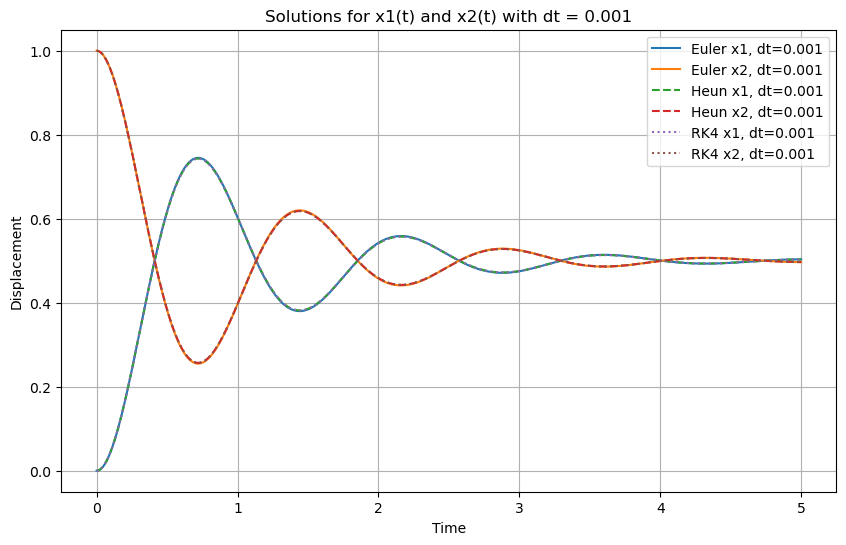

dt = 0.001:
  Euler method error: 0.00038302767044654277
  Heun's method error: 1.4516733944638419e-06
  4th-order Runge-Kutta error: 1.016206311654434e-12


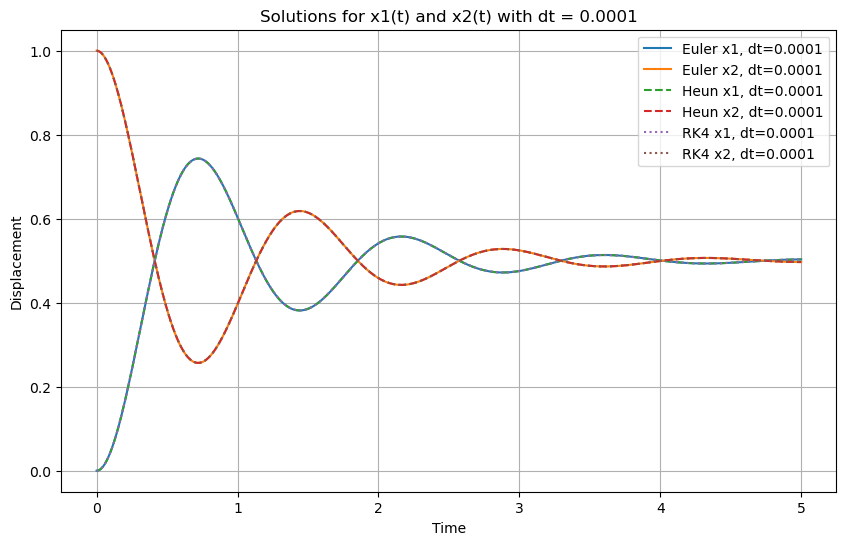

dt = 0.0001:
  Euler method error: 3.6936974059225626e-05
  Heun's method error: 1.4486105610773247e-08
  4th-order Runge-Kutta error: 0.0


In [2]:
# Define the matrix B
B = np.array([
    [0, 1, 0, 0],
    [-10, -1, 10, 1],
    [0, 0, 0, 1],
    [10, 1, -10, -1]
])

# Initial conditions
X0 = np.array([0, 0, 1, 0])

# Time settings
T = 5
time_steps = [10**0, 10**-1, 10**-2, 10**-3, 10**-4]

# Assume the true solution is unknown

# Function to compute the derivative dX/dt = B * X
def derivative(X):
    return B @ X

# Euler method
def euler_method(X0, dt, T):
    num_steps = int(T / dt)
    X = X0.copy()
    solution = [X]
    for _ in range(num_steps):
        X = X + dt * derivative(X)
        solution.append(X)
    return np.array(solution)

# Heun's method
def heun_method(X0, dt, T):
    num_steps = int(T / dt)
    X = X0.copy()
    solution = [X]
    for _ in range(num_steps):
        k1 = derivative(X)
        k2 = derivative(X + dt * k1)
        X = X + dt * 0.5 * (k1 + k2)
        solution.append(X)
    return np.array(solution)

# 4th-order Runge-Kutta method
def rk4_method(X0, dt, T):
    num_steps = int(T / dt)
    X = X0.copy()
    solution = [X]
    for _ in range(num_steps):
        k1 = derivative(X)
        k2 = derivative(X + 0.5 * dt * k1)
        k3 = derivative(X + 0.5 * dt * k2)
        k4 = derivative(X + dt * k3)
        X = X + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        solution.append(X)
    return np.array(solution)

# Function to calculate global error for a given method
def calculate_global_error(true_solution, numerical_solution):
    return np.linalg.norm(true_solution - numerical_solution, ord=2)

# Simulate and compute errors for each method and time step
for dt in time_steps:
    euler_solution = euler_method(X0, dt, T)
    heun_solution = heun_method(X0, dt, T)
    rk4_solution = rk4_method(X0, dt, T)
    
    # Time vector for plotting
    time = np.linspace(0, T, len(euler_solution))
    
    # Plot x1 and x2 for each method
    plt.figure(figsize=(10, 6))
    plt.plot(time, euler_solution[:, 0], label=f'Euler x1, dt={dt}')
    plt.plot(time, euler_solution[:, 2], label=f'Euler x2, dt={dt}')
    plt.plot(time, heun_solution[:, 0], '--', label=f'Heun x1, dt={dt}')
    plt.plot(time, heun_solution[:, 2], '--', label=f'Heun x2, dt={dt}')
    plt.plot(time, rk4_solution[:, 0], ':', label=f'RK4 x1, dt={dt}')
    plt.plot(time, rk4_solution[:, 2], ':', label=f'RK4 x2, dt={dt}')
    plt.xlabel('Time')
    plt.ylabel('Displacement')
    plt.title(f'Solutions for x1(t) and x2(t) with dt = {dt}')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Assuming the RK4 solution with smallest dt is the most accurate, using it as "true" solution
    true_solution = rk4_method(X0, 10**-4, T)
    euler_error = calculate_global_error(true_solution[-1], euler_solution[-1])
    heun_error = calculate_global_error(true_solution[-1], heun_solution[-1])
    rk4_error = calculate_global_error(true_solution[-1], rk4_solution[-1])
    
    print(f"dt = {dt}:")
    print(f"  Euler method error: {euler_error}")
    print(f"  Heun's method error: {heun_error}")
    print(f"  4th-order Runge-Kutta error: {rk4_error}")